In the quantum phase estimation, we start with a state $|\psi \rangle$ which is an eigenstate of a unitary operator U, and we want to find an approximation for the eigenvalue. As the matrix is unitary, its eigenvalue is of the form $e^{2\pi i \Phi}$ with a phase $\Phi$. Choose a number $m$ and the let $\frac{t}{2^m}$ be the best m-bit approximation to $\Phi$. Let $N = 2^m$. The algorithm proceeds essentially in three steps to find $t$.

In the first step, we build a superposition
$$
\frac{1}{\sqrt{2}^m} \sum_{k = 0}^{2^m - 1} e^{2i\pi k \Phi} |k \rangle |\psi \rangle
$$
In the second step, we apply an inverse quantum Fourier transform to the first register. This puts the system into the state
$$
\sum_{- \frac{N}{2} \leq l < \frac{N}{2}} a_l | t + l \, \text{mod} N \rangle |\psi \rangle
$$
where the coefficient $a_l$ is given by
$$
a_l = \sum_{k=0}^{N-1} \frac{1}{2^m} e^{2\pi i \frac{k}{N}(l + \delta N)}
$$
Using the sum formula for the geometric sum and standard trigonometrical relations, we can easily derive the expression
$$
|a_l|^2 = \frac{1}{N^2} \frac{\sin^2 \pi \delta N}{\sin^2 \pi (\frac{l}{N} + \delta)}
$$
Let us plot this function to get an idea how it looks like for different values of N.

In [55]:
# Some imports
import numpy as np
import matplotlib.pyplot as plt


In [56]:
# The function f we want to plot
def f(x,N,d):
    numerator = np.sin(np.pi*d*N)
    numerator = numerator*2
    denominator = np.sin(np.pi*(x/N + d))
    denominator = denominator**2
    return numerator / denominator * (1/N**2)




In [57]:
# Let us now plot f in the range from -N/2 to N/2
def plot(ax,N,d):
    r = np.arange(-N/2, N/2)
    ax.plot(r/N, f(r,N,d))
    ax.set_xlabel("l/N")
    ax.set_ylabel("P")
    


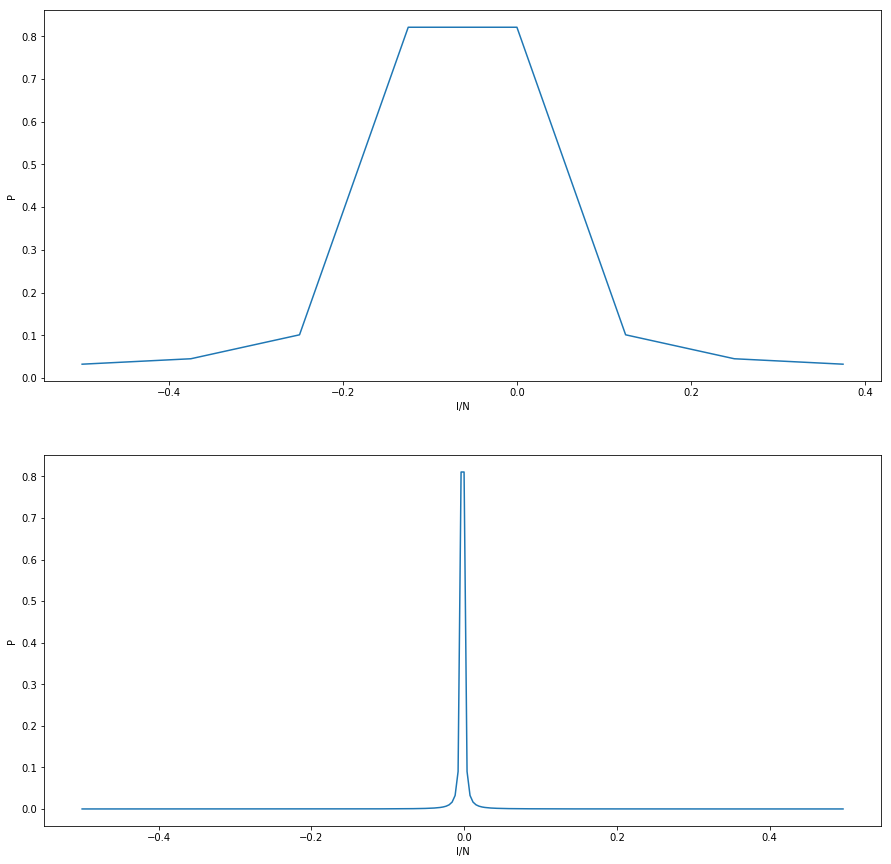

In [58]:
# Now let us plot the amplitudes for several choices
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(2,1,1)
plot(ax,2**3,0.5/2**3)

ax = fig.add_subplot(2,1,2)
plot(ax,2**8,0.5/2**8)


plt.show()